Multiple Linear Regression and Polynomial Regression

In [1]:
import pandas as pd 
pizza = {'diameter': [6, 8, 10, 14, 18],
        'n_topping': [2, 1, 0, 2, 0],
        'harga': [7, 9, 13, 17.5, 18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [2]:
pizza = {'diameter': [8, 9, 11, 16, 12],
        'n_topping': [2, 0, 2, 2, 0],
        'harga': [11, 8.5, 15, 18, 11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


In [3]:
import numpy as np 
x_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


In [4]:
x_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'x_test:\n{x_test}\n')
print(f'y_test: {y_test}')

x_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.7701677731318468


In [7]:
x_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])
print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


In [8]:
from sklearn.preprocessing import PolynomialFeatures
quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
print(f'x_train_quadratic:\n{x_train_quadratic}\n')

x_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



In [9]:
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

LinearRegression()

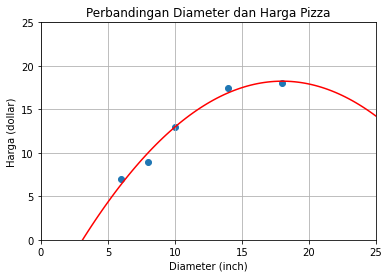

In [10]:
import matplotlib.pyplot as plt

x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)

plt.scatter(x_train, y_train)
plt.plot(x_vis, y_vis_quadratic, '-r')
plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

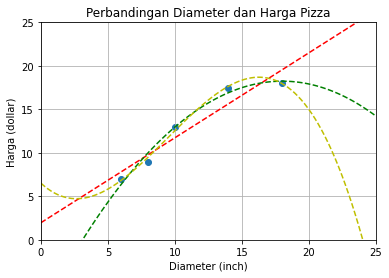

In [11]:
# Training set
plt.scatter(x_train, y_train)

# Linear
model = LinearRegression()
model.fit(x_train, y_train)
x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(x_vis)
plt.plot(x_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_quadratic, y_train)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis = model.predict(x_vis_quadratic)
plt.plot(x_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
x_train_cubic = cubic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_cubic, y_train)
x_vis_cubic = cubic_feature.transform(x_vis)
y_vis = model.predict(x_vis_cubic)
plt.plot(x_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()